## Specific humidity - hus

In [114]:
import xarray as xr
import numpy as np
import scipy

import matplotlib.pyplot as plt
import cartopy
from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [115]:
from metrics.get_variables.myFuncs import *

### one dataset

In [116]:
variable = 'hus'

models = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 # does not have hus variable
    ]

observations = [
    # 'GPCP'
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:hus, dataset:GISS-E2-H, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 10950, plev: 8, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    hus      (time, plev, lat, lon) float32 ...

In [117]:
hus_day = ds[variable]
hus_day

<xarray.DataArray 'hus' (time: 10950, plev: 8, lat: 22, lon: 128)>
[246681600 values with dtype=float32]
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * plev     (plev) float64 1e+05 8.5e+04 7e+04 5e+04 2.5e+04 1e+04 5e+03 1e+03
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative

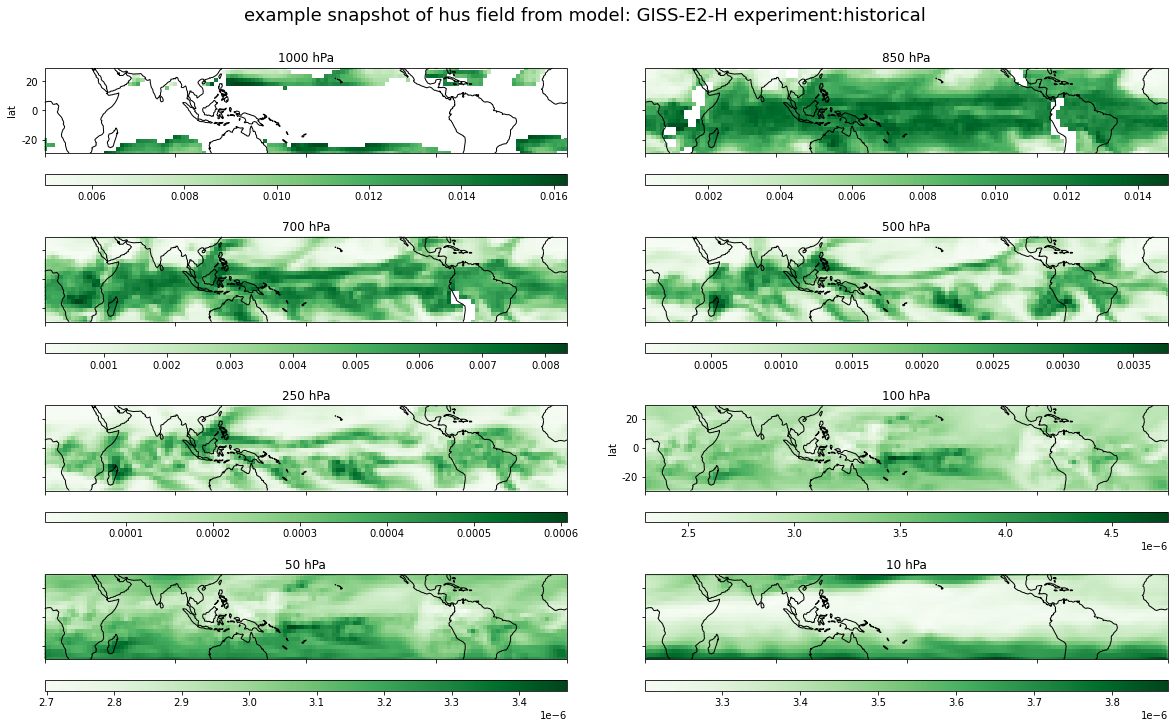

In [118]:
fig= plt.figure(figsize=(20,25))

title = 'example snapshot of {} field from model: {} experiment:{}'.format(variable, models[0], experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6)

for i, plev in enumerate(hus_day['plev']):
    ax= fig.add_subplot(4,2,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    scene = get_dsvariable(variable, datasets[0], experiments[0],home, resolutions[0])[variable].isel(time=0)

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)
        

    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)


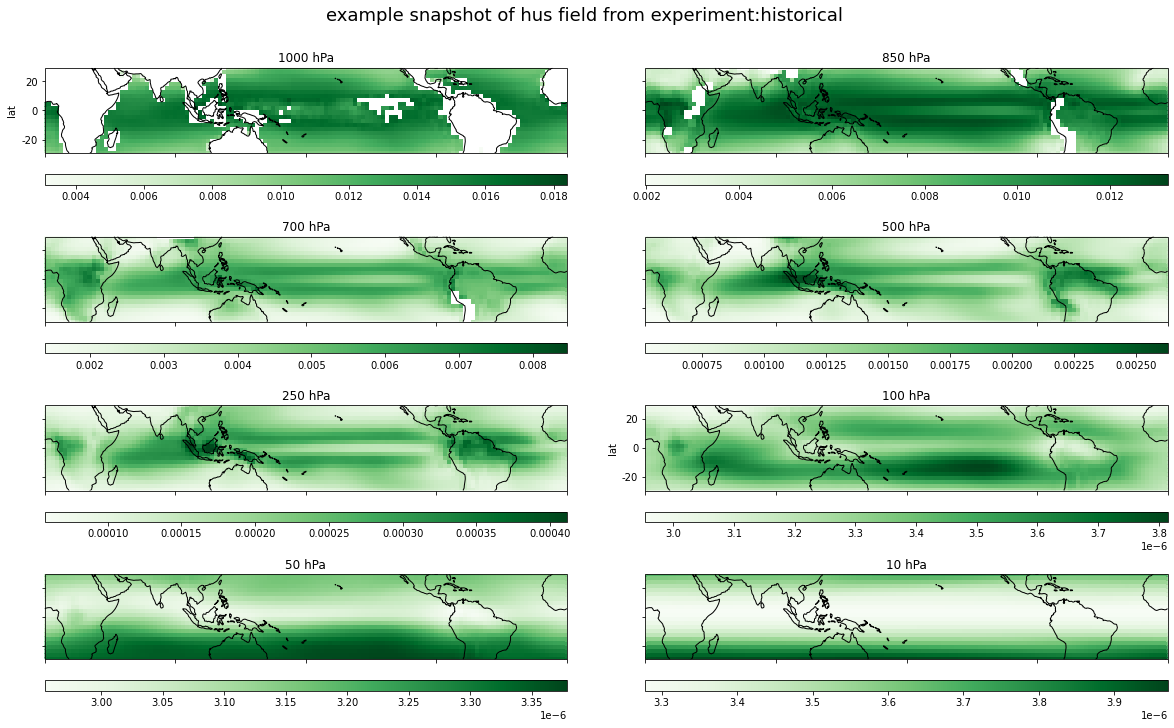

In [119]:
fig= plt.figure(figsize=(20,25))

title = 'example snapshot of {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.6)

for i, plev in enumerate(hus_day['plev']):
    ax= fig.add_subplot(4,2,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    scene = get_dsvariable(variable, datasets[0], experiments[0],home, resolutions[0])[variable].mean(dim='time')

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene.sel(plev=plev),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    plt.title(str(int(plev.values/100))+ ' hPa')

    if i>=20:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])
        plt.colorbar(pcm, ax=ax, orientation='horizontal', pad=0.055, aspect=50, fraction=0.055)

    else:
        plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.025, aspect=50, fraction=0.055)

    if i== 0 or i==5 or i==10 or i==15 or i==20:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)


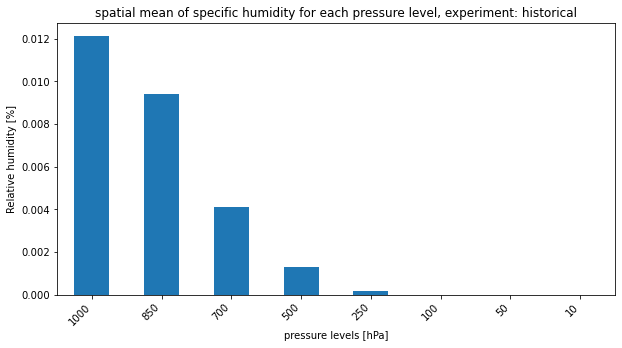

In [120]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))
ds['hus'].weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('spatial mean of specific humidity for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('Relative humidity [%]')
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((ds['hus'].plev.values/100).astype(int), rotation=45, ha='right')
plt.show()

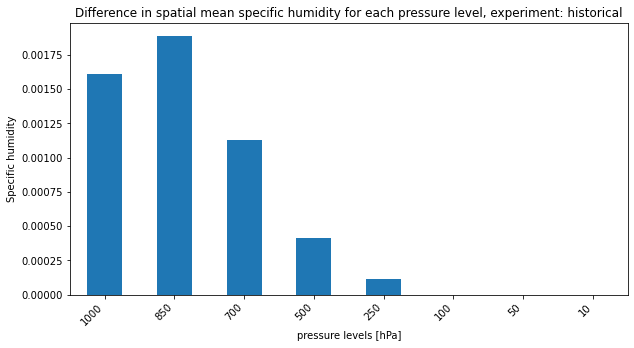

In [121]:
f, ax = plt.subplots(figsize=(10, 5))
aWeights = np.cos(np.deg2rad(ds.lat))

hus_historical = get_dsvariable(variable, datasets[0], experiment = 'historical', resolution=resolutions[0])['hus']
hus_rcp = get_dsvariable(variable, datasets[0], experiment = 'rcp85', resolution=resolutions[0])['hus'] 

hur_diff = xr.DataArray(
    data=hus_rcp.data - hus_historical.data,
    dims=['time', 'plev','lat', 'lon'],
    coords={'time':hus_historical.time.data, 'plev':hus_historical.plev.data, 'lat': hus_historical.lat.data, 'lon': hus_historical.lon.data}
    )

hur_diff.weighted(aWeights).mean(dim=('time','lat','lon')).to_series().plot.bar()
plt.title('Difference in spatial mean specific humidity for each pressure level, experiment: {}'.format(experiments[0]))
plt.ylabel('Specific humidity')
plt.xlabel('pressure levels [hPa]')
ax.set_xticklabels((ds['hus'].plev.values/100).astype(int), rotation=45, ha='right')
plt.show()

In [122]:
# similar to relative humidity there are many missing values over land at the 1000 hPa level. From p<=850 hpa, the mountains are missing, but we can fill that with zero.

In [123]:
hus = ds['hus'].sel(plev=slice(850e2,0)).fillna(0)

g = 9.8
hus = xr.DataArray(
    data= -scipy.integrate.simpson(hus.data, hus.plev.data, axis=1, even='last')/g,
    dims=['time','lat', 'lon'],
    coords={'time': hus.time.data, 'lat': hus.lat.data, 'lon': hus.lon.data},
    attrs={'units':'mm',
            'Description': 'precipitable water from 850-0 hpa'}
    )
hus

<xarray.DataArray (time: 10950, lat: 22, lon: 128)>
array([[[ 6.06672804,  6.74159685,  7.53178529, ...,  6.87453774,
          6.1155237 ,  5.70847097],
        [ 6.43928496,  6.33491366,  6.2551738 , ...,  8.22300831,
          7.59846862,  6.94505541],
        [ 5.9323673 ,  6.30464463,  6.55171116, ...,  7.12809814,
          6.69270638,  6.13677422],
        ...,
        [ 0.78970571,  0.8747562 ,  1.2027105 , ...,  0.76876202,
          0.87230073,  0.80007374],
        [ 0.87452317,  1.04592351,  1.41818754, ...,  1.26390679,
          1.2456567 ,  0.996545  ],
        [ 1.81325604,  2.00991551,  2.15317852, ...,  1.93682688,
          1.75466467,  1.71676742]],

       [[ 8.90830077,  7.96988732,  7.06758767, ...,  7.80860214,
          9.30564384,  9.689339  ],
        [ 6.74659254,  6.08444518,  6.11272939, ...,  9.55134121,
          8.93596516,  7.87235469],
        [ 5.97133427,  5.63244392,  6.24663569, ...,  8.44049807,
          7.45423987,  6.71582605],
...
        [ 3.69706023,  3.60690462,  4.72765854, ...,  4.77472706,
          4.89292669,  4.45585627],
        [ 4.56290224,  4.51942811,  4.73505284, ...,  4.83051925,
          5.03883261,  4.73656879],
        [ 3.71731681,  4.75690256,  5.00920254, ...,  3.75683247,
          3.36750771,  3.32893495]],

       [[ 3.49391952,  3.1977328 ,  2.66791921, ...,  2.57722027,
          2.92293227,  3.19539892],
        [ 2.45383168,  2.19355386,  2.26328195, ...,  2.24839774,
          2.3131718 ,  2.35980227],
        [ 3.44702925,  4.0839432 ,  4.52297858, ...,  3.48193324,
          3.25487651,  3.26320393],
        ...,
        [ 3.47430682,  3.88320096,  4.41148179, ...,  3.20850121,
          2.75056951,  2.8999284 ],
        [ 2.88294894,  3.92397479,  4.76361571, ...,  2.8043765 ,
          2.14012794,  2.02648504],
        [ 3.07921225,  3.45509352,  3.90233504, ...,  2.52933547,
          3.3458454 ,  3.11944126]]])
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    units:        mm
    Description:  precipitable water from 850-0 hpa

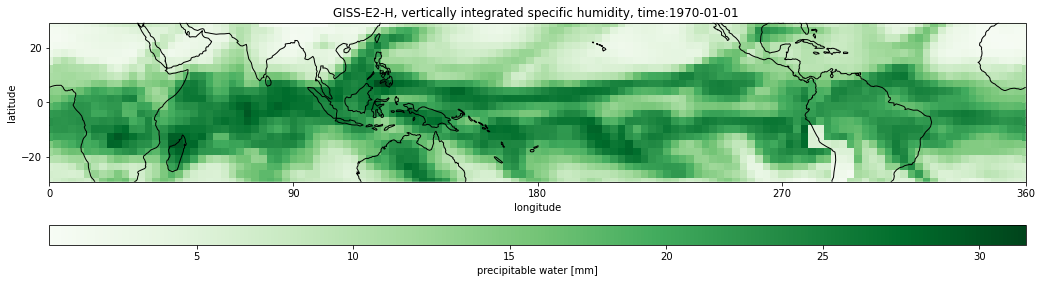

In [124]:
fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

scene = hus.isel(time=0)

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)
ax.set_title(datasets[0] + ', vertically integrated specific humidity, time:' + str(scene.coords['time'].values)[:11] )
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'precipitable water' + ' [{}]'.format(scene.attrs['units']))

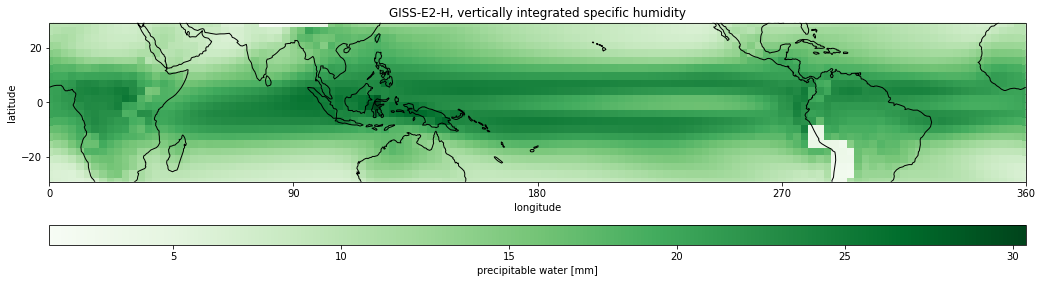

In [125]:
fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

scene = hus.mean(dim='time')

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=None, vmax=None)
ax.set_title(datasets[0] + ', vertically integrated specific humidity')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'precipitable water' + ' [{}]'.format(hus.attrs['units']))

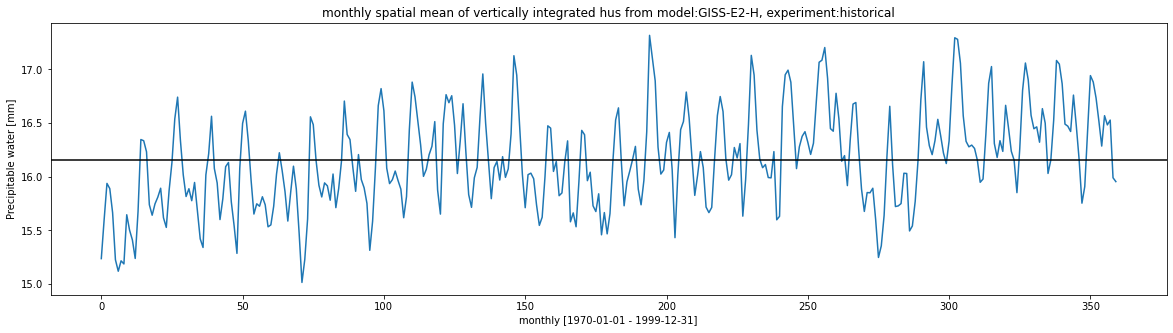

In [126]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly'
    # 'daily'
    ]

aWeights = np.cos(np.deg2rad(hus.lat))
y= hus.weighted(aWeights).mean(dim=('lat','lon')) 
title = '{} spatial mean of {} from model:{}, experiment:{}'.format(timeMean_options[0], 'vertically integrated hus', datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(hus.isel(time=0).coords['time'].values)[:10], str(hus.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Precipitable water', hus.units)


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

### comparing datasets

In [127]:
variable = 'hus'

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7 Does not have warming scenario
    'BNU-ESM',      # 8
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    ]

observations = [
    ]

datasets = models + observations

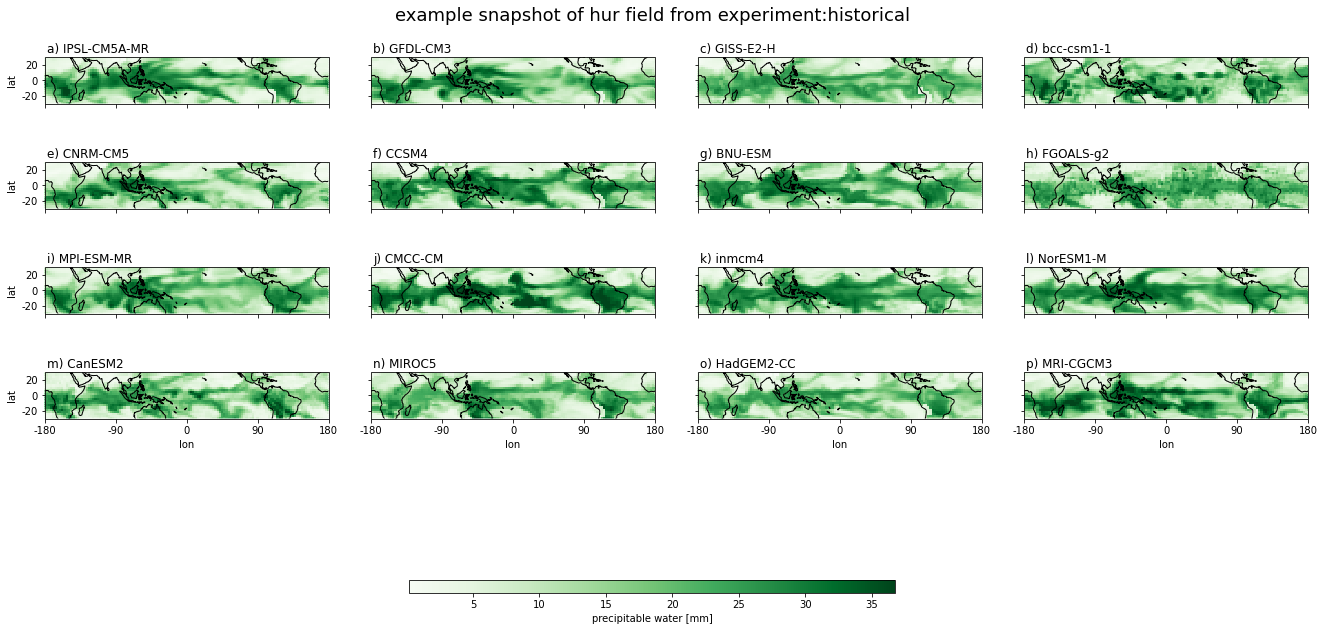

In [128]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.975
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        scene = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hus'].isel(time=0).sel(plev=slice(850e2,0)).fillna(0)
        g = 9.8
        scene = xr.DataArray(
            data= -scipy.integrate.simpson(scene.data, scene.plev.data, axis=0, even='last')/g,
            dims=['lat', 'lon'],
            coords={'lat': scene.lat.data, 'lon': scene.lon.data},
            attrs={'units':'mm',
                    'Description': 'precipitable water from 850-0 hpa'}
            )
        y= scene

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'example snapshot of {} field from experiment:{}'.format('hur', experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
    scene = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hus'].isel(time=0).sel(plev=slice(850e2,0)).fillna(0)
    g = 9.8
    scene = xr.DataArray(
        data= -scipy.integrate.simpson(scene.data, scene.plev.data, axis=0, even='last')/g,
        dims=['lat', 'lon'],
        coords={'lat': scene.lat.data, 'lon': scene.lon.data},
        attrs={'units':'mm',
                'Description': 'precipitable water from 850-0 hpa'}
        )

    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=vmin, vmax=vmax)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('precipitable water', 'mm'))

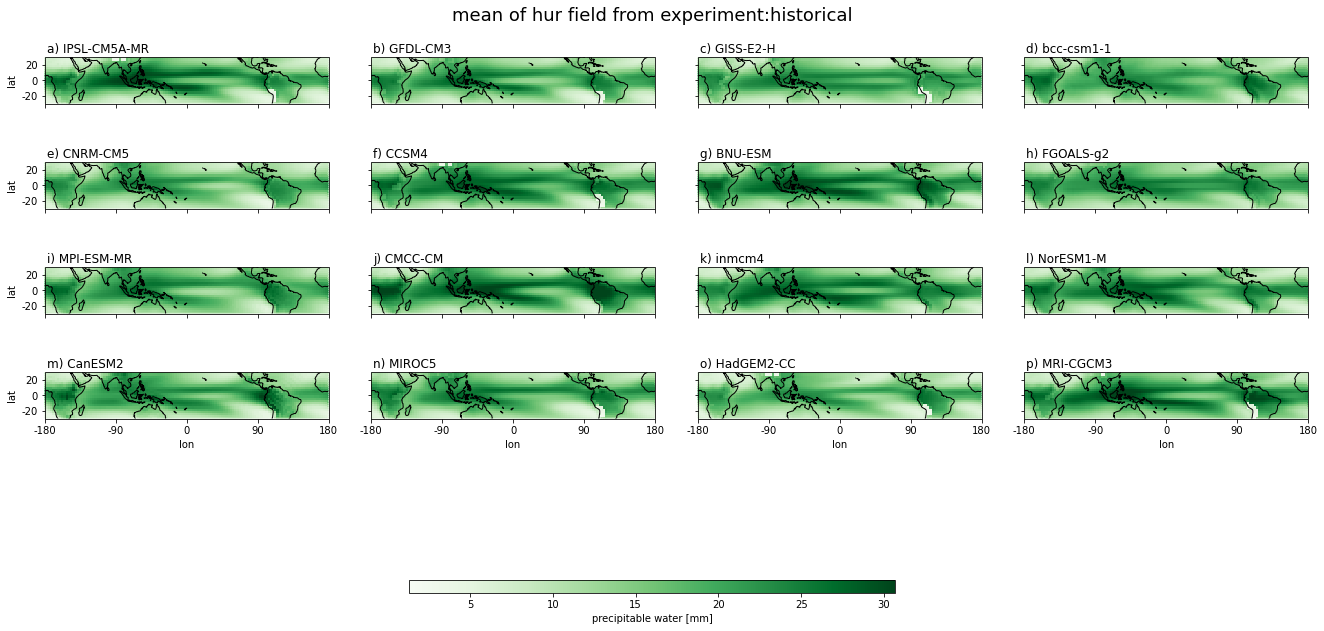

In [129]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.975
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        
        scene = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0).mean(dim='time')
        g = 9.8
        scene = xr.DataArray(
            data= -scipy.integrate.simpson(scene.data, scene.plev.data, axis=0, even='last')/g,
            dims=['lat', 'lon'],
            coords={'lat': scene.lat.data, 'lon': scene.lon.data},
            attrs={'units':'mm',
                    'Description': 'precipitable water from 850-0 hpa'}
            )
        y= scene

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'mean of {} field from experiment:{}'.format('hur', experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
    
    scene = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0).mean(dim='time')
    g = 9.8
    scene = xr.DataArray(
        data= -scipy.integrate.simpson(scene.data, scene.plev.data, axis=0, even='last')/g,
        dims=['lat', 'lon'],
        coords={'lat': scene.lat.data, 'lon': scene.lon.data},
        attrs={'units':'mm',
                'Description': 'precipitable water from 850-0 hpa'}
        )
        
    lat = scene.lat
    lon = scene.lon
    lonm,latm = np.meshgrid(lon,lat)

    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Greens', vmin=vmin, vmax=vmax)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)
cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('precipitable water', 'mm'))

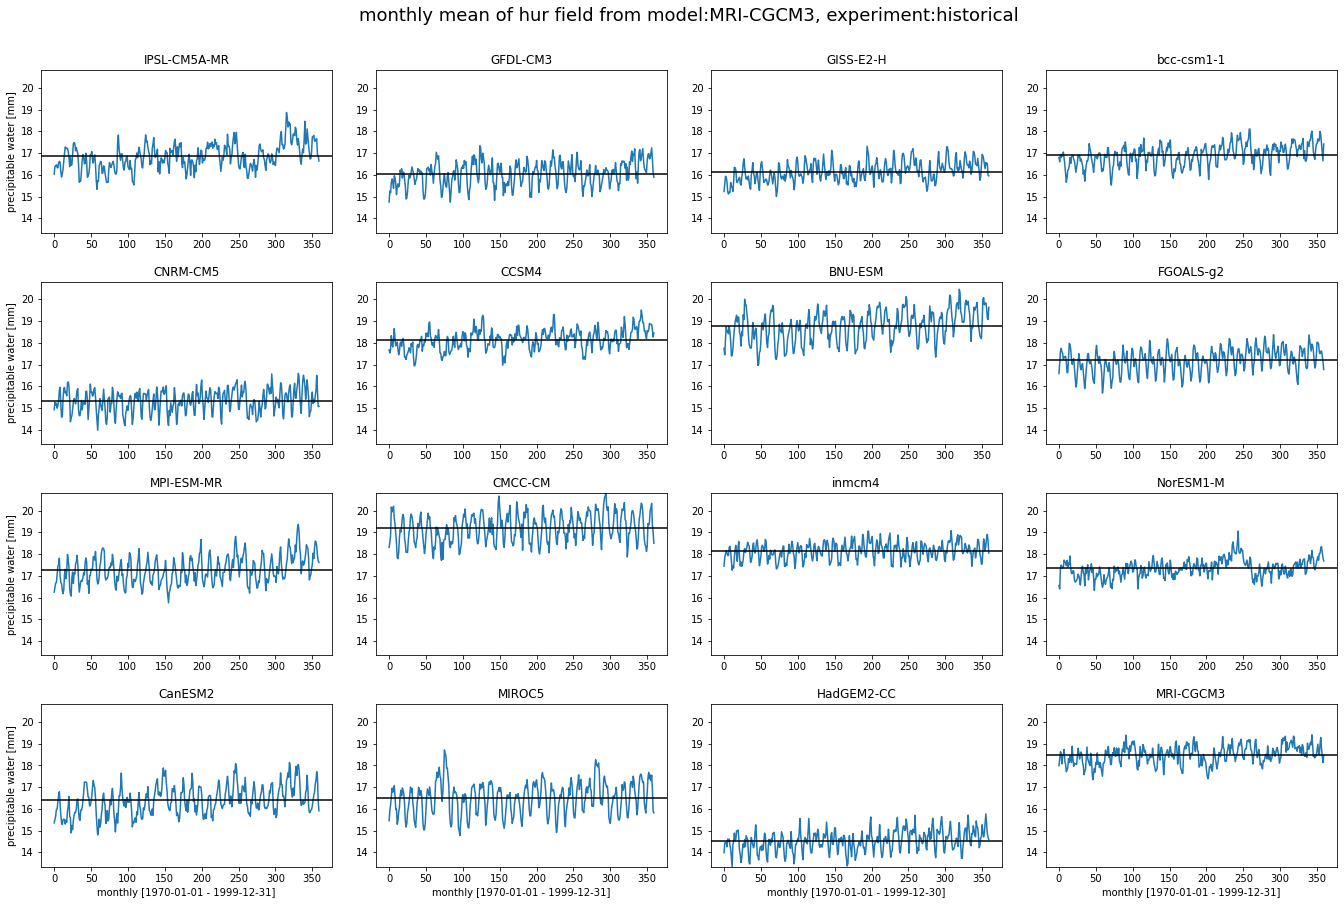

In [130]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0)
        g = 9.8
        data = xr.DataArray(
            data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
            dims=['time', 'lat', 'lon'],
            coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
            attrs={'units':'mm',
                    'Description': 'precipitable water from 850-0 hpa'}
            )
        aWeights = np.cos(np.deg2rad(data.lat))
        data = data.weighted(aWeights).mean(dim=('lat','lon'))
        y= data

        if timeMean_options[0] == 'annual':
            y = y.resample(time='Y').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'seasonal':
            y = y.resample(time='QS-DEC').mean(dim="time")
            y = to_monthly(y)
            y = y.rename({'month':'season'})
            y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])
            y = y.isel(year=slice(1, None))

        if timeMean_options[0] == 'monthly':
            y = y.resample(time='M').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'daily':
            y = y

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} mean of {} field from model:{}, experiment:{}'.format(timeMean_options[0], 'hur', dataset, experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    
    data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0)
    g = 9.8
    data = xr.DataArray(
        data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
        dims=['time', 'lat', 'lon'],
        coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
        attrs={'units':'mm',
                'Description': 'precipitable water from 850-0 hpa'}
        )
    aWeights = np.cos(np.deg2rad(data.lat))
    data = data.weighted(aWeights).mean(dim=('lat','lon'))

    title = dataset
    ax= fig.add_subplot(5,4,i+1)
    plot_timeseries(data, title=title, timeMean_option=timeMean_options, ax=ax, ymin=vmin, ymax=vmax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
        plt.xlabel(xlabel)

        if timeMean_options[0]=='seasonal':
            plt.legend()

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format('precipitable water', 'mm')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

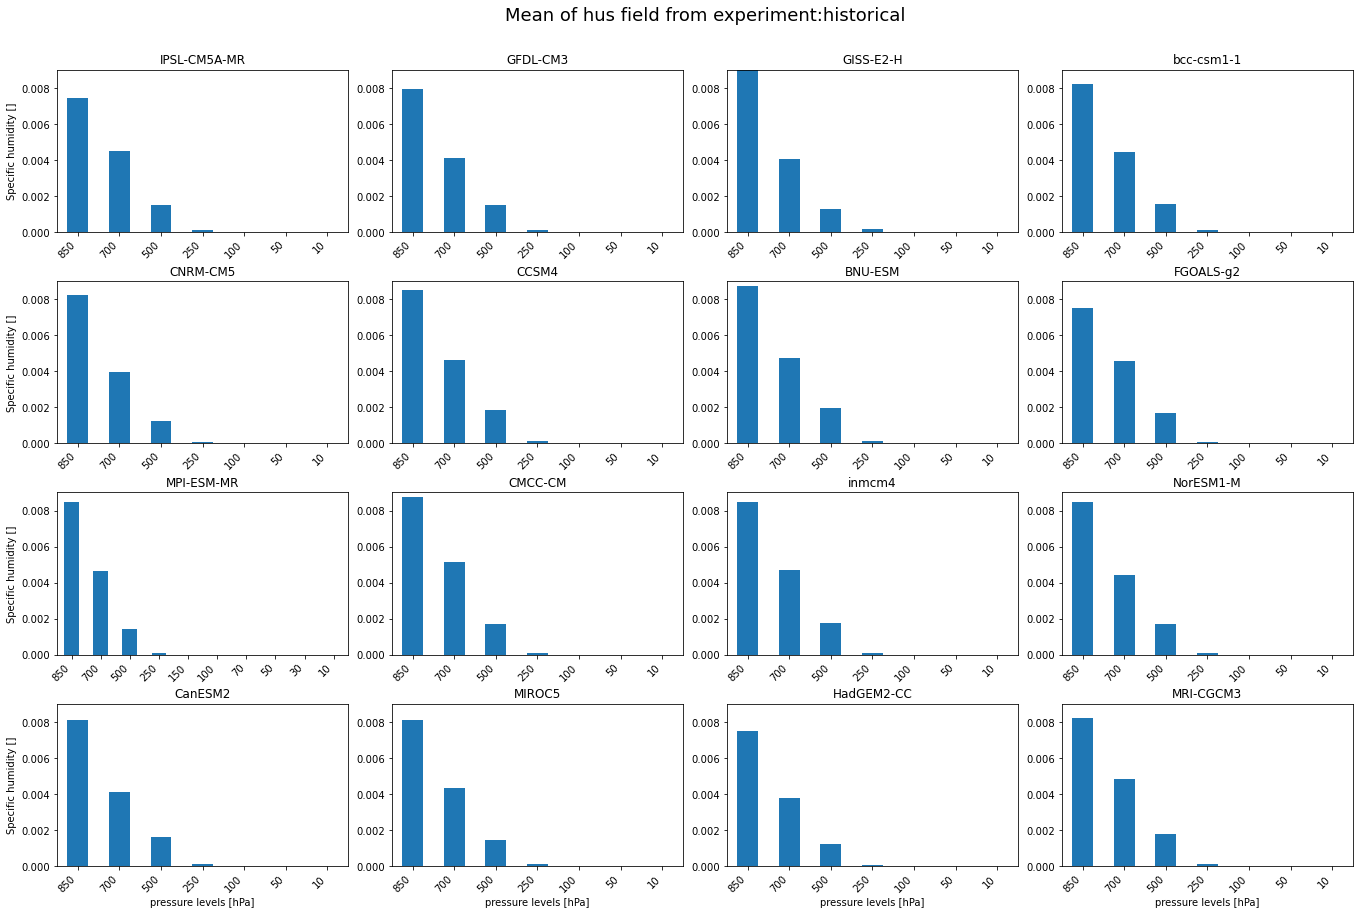

In [131]:
absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hus'].sel(plev=slice(850e2,10e2)).fillna(0).mean(dim='time')
        aWeights = np.cos(np.deg2rad(data.lat))
        data = data.weighted(aWeights).mean(dim=('lat','lon'))
        y= data

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Mean of {} field from experiment:{}'.format('hus', experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    
    data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hus'].sel(plev=slice(850e2,10e2)).fillna(0).mean(dim='time')
    aWeights = np.cos(np.deg2rad(data.lat))

    ax= fig.add_subplot(5,4,i+1)
    data.weighted(aWeights).mean(dim=('lat','lon')).to_series().plot.bar()
    plt.ylim([vmin, vmax])
    plt.title(dataset)

    ax.set_xticklabels((data.plev.sel(plev=slice(850e2,10e2)).values/100).astype(int), rotation=45, ha='right')
    plt.xlabel('')

    if (len(datasets)-i)<=4:
        plt.xlabel('pressure levels [hPa]')

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('Specific humidity []')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
plt.show()

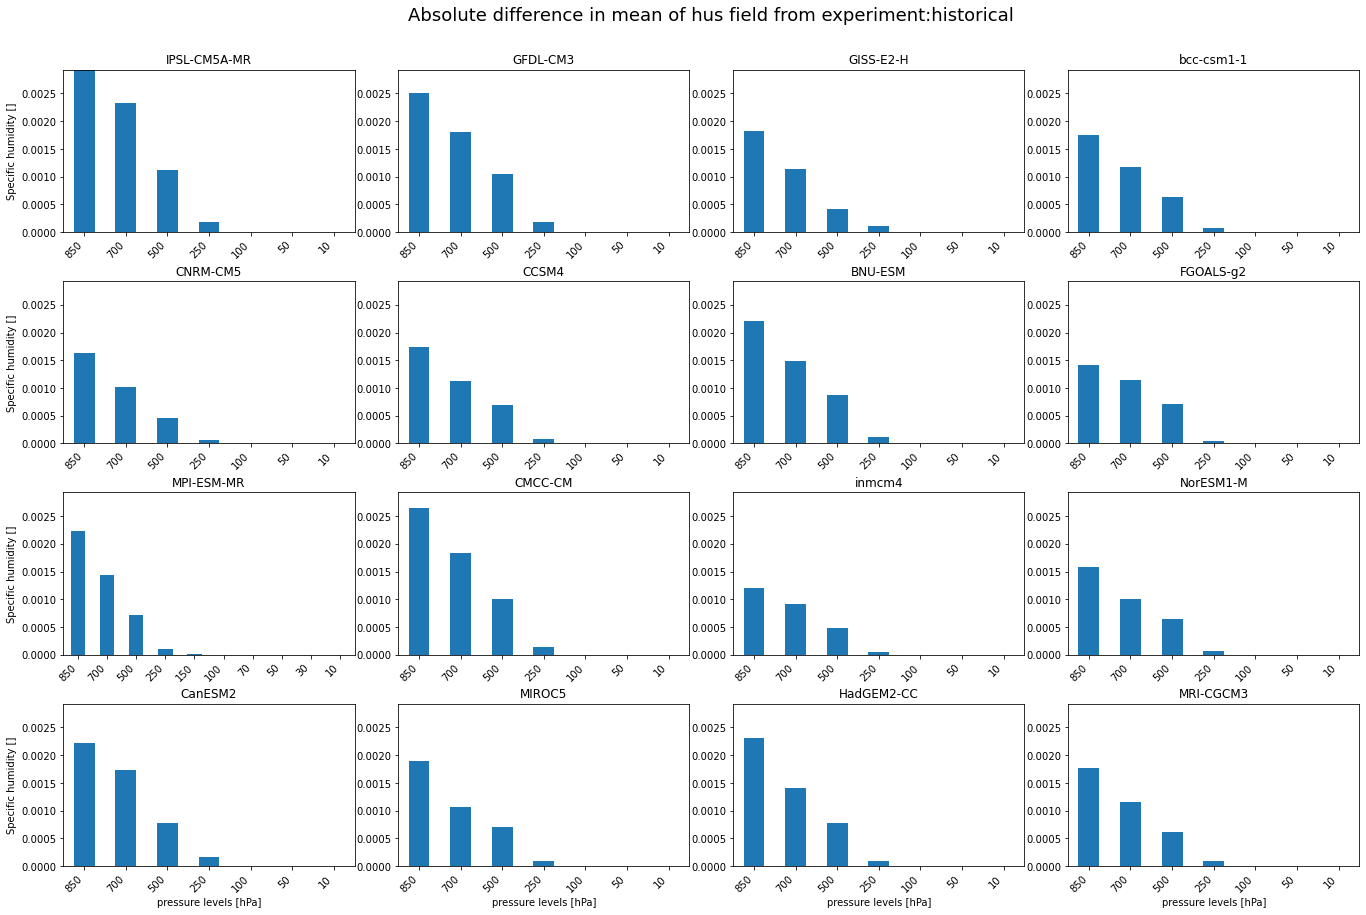

In [132]:
absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        
        data_historical = get_dsvariable(variable, dataset, experiment = 'historical', resolution=resolutions[0])['hus'].sel(plev = slice(850e2, 10e2)).fillna(0).mean(dim='time')
        data_rcp = get_dsvariable(variable, dataset, experiment = 'rcp85', resolution=resolutions[0])['hus'].sel(plev = slice(850e2, 10e2)).fillna(0).mean(dim='time')

        data_diff = xr.DataArray(
            data=data_rcp.data - data_historical.data,
            dims=['plev','lat', 'lon'],
            coords={'plev':data_historical.plev.data, 'lat': data_historical.lat.data, 'lon': data_historical.lon.data}
            )

        aWeights = np.cos(np.deg2rad(data_diff.lat))
        data_diff = data_diff.weighted(aWeights).mean(dim=('lat','lon'))

        y= data_diff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Absolute difference in mean of {} field from experiment:{}'.format('hus', experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    
    data_historical = get_dsvariable(variable, dataset, experiment = 'historical', resolution=resolutions[0])['hus'].sel(plev = slice(850e2, 10e2)).fillna(0).mean(dim='time')
    data_rcp = get_dsvariable(variable, dataset, experiment = 'rcp85', resolution=resolutions[0])['hus'].sel(plev = slice(850e2, 10e2)).fillna(0).mean(dim='time')

    data_diff = xr.DataArray(
        data=data_rcp.data - data_historical.data,
        dims=['plev','lat', 'lon'],
        coords={'plev':data_historical.plev.data, 'lat': data_historical.lat.data, 'lon': data_historical.lon.data}
        )

    aWeights = np.cos(np.deg2rad(data_diff.lat))
    data_diff = data_diff.weighted(aWeights).mean(dim=('lat','lon'))

    title = dataset
    ax= fig.add_subplot(5,4,i+1)
    data_diff.to_series().plot.bar()
    plt.ylim([vmin, vmax])
    plt.title(dataset)

    ax.set_xticklabels((data_historical.plev.sel(plev=slice(850e2,10e2)).values/100).astype(int), rotation=45, ha='right')
    plt.xlabel('')

    if (len(datasets)-i)<=4:
        plt.xlabel('pressure levels [hPa]')

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('Specific humidity []')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
plt.show()

Text(0, 0.5, 'precipitable water [mm]')

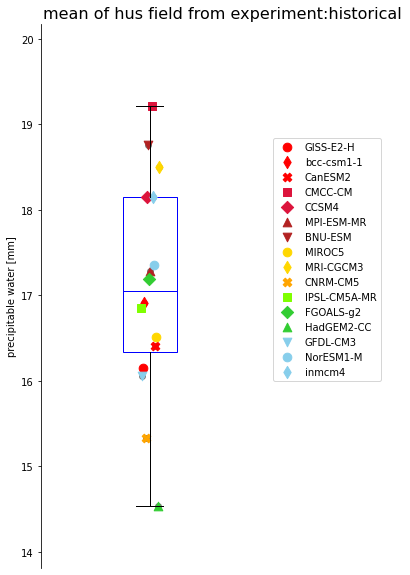

In [133]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

colors = [
    'red', 'red', 'red', 'crimson', 'crimson', 'firebrick', 'firebrick', # red
    'gold', 'gold', 'orange', # yellow
    'chartreuse', 'limegreen', 'limegreen', # green
    'skyblue', 'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']

order_by_tas = True
if order_by_tas:
    order_list = []
    for dataset in datasets:
        if dataset == 'GPCP':
            order_list = np.append(order_list, 0)
        else:
            data = get_metric('tas_tMean', dataset, experiment=experiments[0])['tas_tMean']
            aWeights = np.cos(np.deg2rad(data.lat))
            tas = data.weighted(aWeights).mean(dim=('lat','lon'))
            order_list = np.append(order_list, tas)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0)
        g = 9.8
        data = xr.DataArray(
            data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
            dims=['time', 'lat', 'lon'],
            coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
            attrs={'units':'mm',
                    'Description': 'precipitable water from 850-0 hpa'}
            )
        aWeights = np.cos(np.deg2rad(data.lat))
        data = data.weighted(aWeights).mean(dim=('time', 'lat','lon'))

        y = data

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


plt.figure(figsize=(6.5,10))
title = 'mean of {} field from experiment:{}'.format(variable, experiments[0])
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiments[0],home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0)
    g = 9.8
    data = xr.DataArray(
        data= -scipy.integrate.simpson(data.data, data.plev.data, axis=1, even='last')/g,
        dims=['time', 'lat', 'lon'],
        coords={'time':data.time, 'lat': data.lat.data, 'lon': data.lon.data},
        attrs={'units':'mm',
                'Description': 'precipitable water from 850-0 hpa'}
        )
    aWeights = np.cos(np.deg2rad(data.lat))
    data = data.weighted(aWeights).mean(dim=('time','lat','lon'))

    y_data = data

    y = np.append(y, y_data)


plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()

    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
        
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('precipitable water [{}]'.format('mm'))

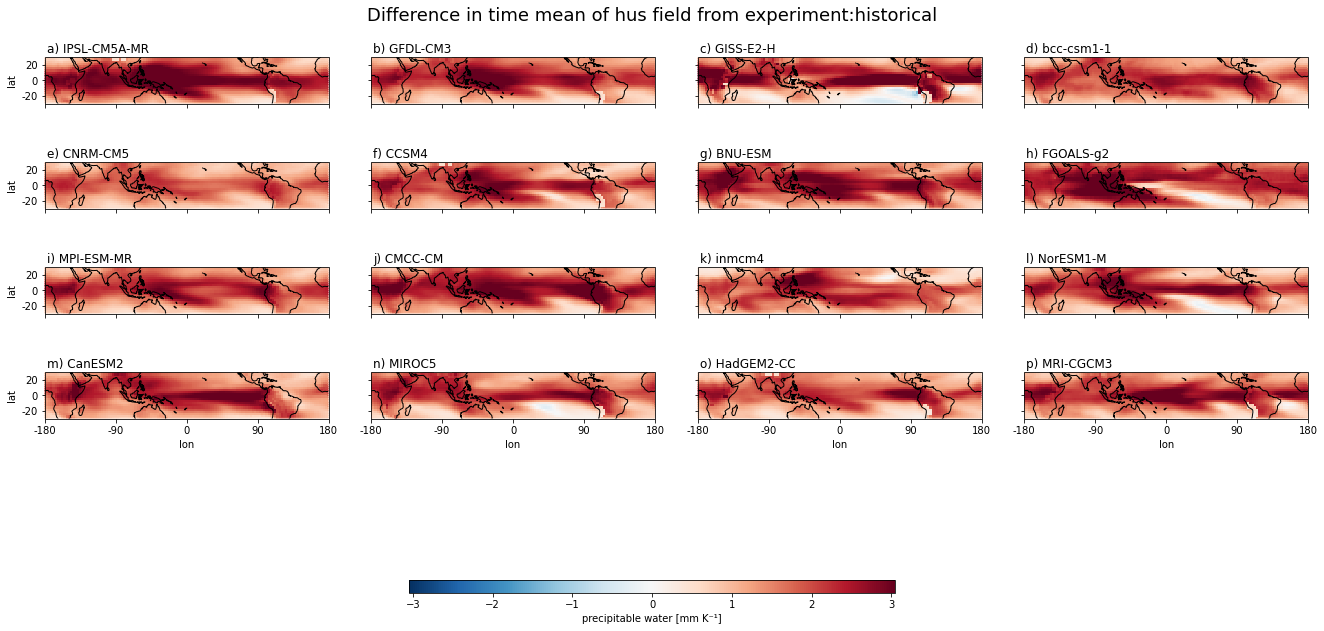

In [134]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        
        data_historical = get_dsvariable(variable, dataset, 'historical',home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0).mean(dim=('time'))
        g = 9.8
        data_historical = xr.DataArray(
            data= -scipy.integrate.simpson(data_historical.data, data_historical.plev.data, axis=0, even='last')/g,
            dims=['lat', 'lon'],
            coords={'lat': data_historical.lat.data, 'lon': data_historical.lon.data},
            attrs={'units':'mm',
                    'Description': 'precipitable water from 850-0 hpa'}
            )


        data_rcp = get_dsvariable(variable, dataset, 'rcp85',home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0).mean(dim=('time'))
        g = 9.8
        data_rcp = xr.DataArray(
            data= -scipy.integrate.simpson(data_rcp.data, data_rcp.plev.data, axis=0, even='last')/g,
            dims=['lat', 'lon'],
            coords={'lat': data_rcp.lat.data, 'lon': data_rcp.lon.data},
            attrs={'units':'mm',
                    'Description': 'precipitable water from 850-0 hpa'}
            )

        tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        tas_rcp = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

        datadiff = data_rcp - data_historical
        # datadiff = (datadiff/data_historical)*100

        tasdiff = tas_rcp - tas_historical
        datadiff = datadiff/tasdiff

        y= datadiff

    vmin = np.append(vmin, np.quantile(y, quantile_low))
    vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Difference in time mean of {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
            
    data_historical = get_dsvariable(variable, dataset, 'historical',home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0).mean(dim=('time'))
    g = 9.8
    data_historical = xr.DataArray(
        data= -scipy.integrate.simpson(data_historical.data, data_historical.plev.data, axis=0, even='last')/g,
        dims=['lat', 'lon'],
        coords={'lat': data_historical.lat.data, 'lon': data_historical.lon.data},
        attrs={'units':'mm',
                'Description': 'precipitable water from 850-0 hpa'}
        )


    data_rcp = get_dsvariable(variable, dataset, 'rcp85',home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0).mean(dim=('time'))
    g = 9.8
    data_rcp = xr.DataArray(
        data= -scipy.integrate.simpson(data_rcp.data, data_rcp.plev.data, axis=0, even='last')/g,
        dims=['lat', 'lon'],
        coords={'lat': data_rcp.lat.data, 'lon': data_rcp.lon.data},
        attrs={'units':'mm',
                'Description': 'precipitable water from 850-0 hpa'}
        )

    tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    tas_rcp = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

    datadiff = data_rcp - data_historical
    # datadiff = (datadiff/data_historical)*100

    tasdiff = tas_rcp - tas_historical
    datadiff = datadiff/tasdiff

    y= datadiff
    cmap = 'RdBu_r'

    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))
    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=-vmax, vmax=vmax)
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])


plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)
cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('precipitable water', 'mm K' + chr(0x207B) + chr(0x00B9)))


Text(0, 0.5, 'precipitable water [mm K⁻¹]')

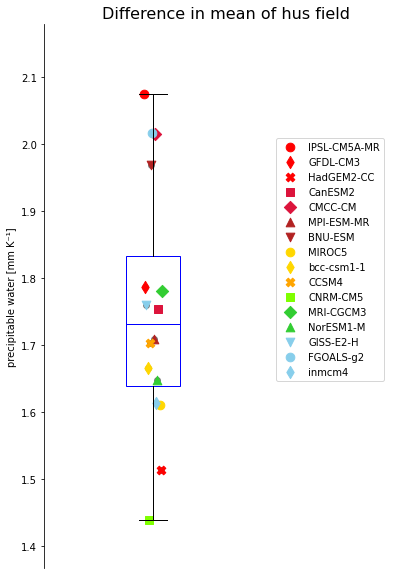

In [135]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

colors = [
    'red', 'red', 'red', 'crimson', 'crimson', 'firebrick', 'firebrick', # red
    'gold', 'gold', 'orange', # yellow
    'chartreuse', 'limegreen', 'limegreen', # green
    'skyblue', 'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']


order_by_tasdiff = True
if order_by_tasdiff:
    order_list = []
    for dataset in datasets:

        if dataset == 'GPCP':
            order_list = np.append(order_list, 0)
        else:
            tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean']
            aWeights = np.cos(np.deg2rad(tas_historical.lat))

            tas_historical = get_metric('tas_tMean', dataset, experiment='historical')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
            tas_rcp = get_metric('tas_tMean', dataset, experiment='rcp85')['tas_tMean'].weighted(aWeights).mean(dim=('lat','lon'))
            tasdiff = tas_rcp - tas_historical
            order_list = np.append(order_list, tasdiff)
    order = np.argsort(order_list)[::-1]
else:
    order = np.arange(len(datasets), dtype=int)
    colors.reverse()


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        
        data_historical = get_dsvariable(variable, dataset, 'historical',home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0).mean(dim=('time'))
        g = 9.8
        data_historical = xr.DataArray(
            data= -scipy.integrate.simpson(data_historical.data, data_historical.plev.data, axis=0, even='last')/g,
            dims=['lat', 'lon'],
            coords={'lat': data_historical.lat.data, 'lon': data_historical.lon.data},
            attrs={'units':'mm',
                    'Description': 'precipitable water from 850-0 hpa'}
            )
        aWeights = np.cos(np.deg2rad(data_historical.lat))
        data_historical = data_historical.weighted(aWeights).mean(dim=('lat','lon'))


        data_rcp = get_dsvariable(variable, dataset, 'rcp85',home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0).mean(dim=('time'))
        g = 9.8
        data_rcp = xr.DataArray(
            data= -scipy.integrate.simpson(data_rcp.data, data_rcp.plev.data, axis=0, even='last')/g,
            dims=['lat', 'lon'],
            coords={'lat': data_rcp.lat.data, 'lon': data_rcp.lon.data},
            attrs={'units':'mm',
                    'Description': 'precipitable water from 850-0 hpa'}
            )
        aWeights = np.cos(np.deg2rad(data_rcp.lat))
        data_rcp = data_rcp.weighted(aWeights).mean(dim=('lat','lon'))

        tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
        tas_rcp = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

        datadiff = data_rcp - data_historical
        # datadiff = (datadiff/data_historical)*100

        tasdiff = tas_rcp - tas_historical
        datadiff = datadiff/tasdiff

        y= datadiff

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 



plt.figure(figsize=(6.5,10))
title = 'Difference in mean of {} field'.format(variable)
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:

    data_historical = get_dsvariable(variable, dataset, 'historical',home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0).mean(dim=('time'))
    g = 9.8
    data_historical = xr.DataArray(
        data= -scipy.integrate.simpson(data_historical.data, data_historical.plev.data, axis=0, even='last')/g,
        dims=['lat', 'lon'],
        coords={'lat': data_historical.lat.data, 'lon': data_historical.lon.data},
        attrs={'units':'mm',
                'Description': 'precipitable water from 850-0 hpa'}
        )
    aWeights = np.cos(np.deg2rad(data_historical.lat))
    data_historical = data_historical.weighted(aWeights).mean(dim=('lat','lon'))


    data_rcp = get_dsvariable(variable, dataset, 'rcp85',home, resolutions[0])['hus'].sel(plev=slice(850e2,0)).fillna(0).mean(dim=('time'))
    g = 9.8
    data_rcp = xr.DataArray(
        data= -scipy.integrate.simpson(data_rcp.data, data_rcp.plev.data, axis=0, even='last')/g,
        dims=['lat', 'lon'],
        coords={'lat': data_rcp.lat.data, 'lon': data_rcp.lon.data},
        attrs={'units':'mm',
                'Description': 'precipitable water from 850-0 hpa'}
        )
    aWeights = np.cos(np.deg2rad(data_rcp.lat))
    data_rcp = data_rcp.weighted(aWeights).mean(dim=('lat','lon'))

    tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    tas_rcp = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

    datadiff = data_rcp - data_historical
    # datadiff = (datadiff/data_historical)*100
    tasdiff = tas_rcp - tas_historical
    
    datadiff = datadiff/tasdiff
    datadiff
    
    y = np.append(y, datadiff)
    
plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()

    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('precipitable water [{}]'.format('mm K' + chr(0x207B) + chr(0x00B9)))